# Part1 : Exploration des données et l'interprétation  du résumé statistique des Data Sets avec Pandas:

In [1]:
import pandas as pd

# Chargement des données sur l'expérience et le salaire
exp_salary = pd.read_csv("datasets/Salary_Data.csv")
print("Expérience et Salaire :")
print(exp_salary.head())

Expérience et Salaire :
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [2]:
# Chargement des données sur l'assurance
insurance = pd.read_csv("datasets/insurance.csv")
print("\nAssurance :")
print(insurance.head())


Assurance :
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
# Chargement des données sur le PIB de la Chine
gdp = pd.read_csv("datasets/china_gdp.csv")
print("\nChina GDP :")
print(gdp.head())


China GDP :
   Year         Value
0  1960  5.918412e+10
1  1961  4.955705e+10
2  1962  4.668518e+10
3  1963  5.009730e+10
4  1964  5.906225e+10


In [4]:
# Résumé statistique de l'expérience et du salaire
print("Résumé statistique de l'expérience et du salaire :")
print(exp_salary.describe())

# Résumé statistique de l'assurance
print("\nRésumé statistique de l'assurance :")
print(insurance.describe())

# Résumé statistique du PIB de la Chine
print("\nRésumé statistique du PIB de la Chine :")
print(gdp.describe())


Résumé statistique de l'expérience et du salaire :
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

Résumé statistique de l'assurance :
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Résumé statistique du PIB de la Chine 

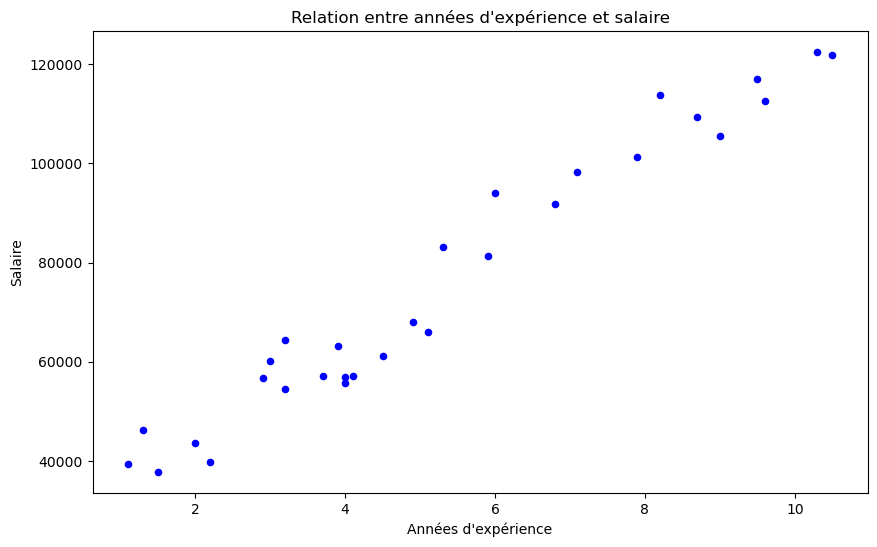

In [8]:
import matplotlib.pyplot as plt

# Affichage du nuage de points
exp_salary.plot(kind='scatter', x='YearsExperience', y='Salary', figsize=(10, 6), color='blue')

# Configuration du titre et des axes
plt.title('Relation entre années d\'expérience et salaire')
plt.xlabel('Années d\'expérience')
plt.ylabel('Salaire')

# Affichage du nuage de points
plt.show()


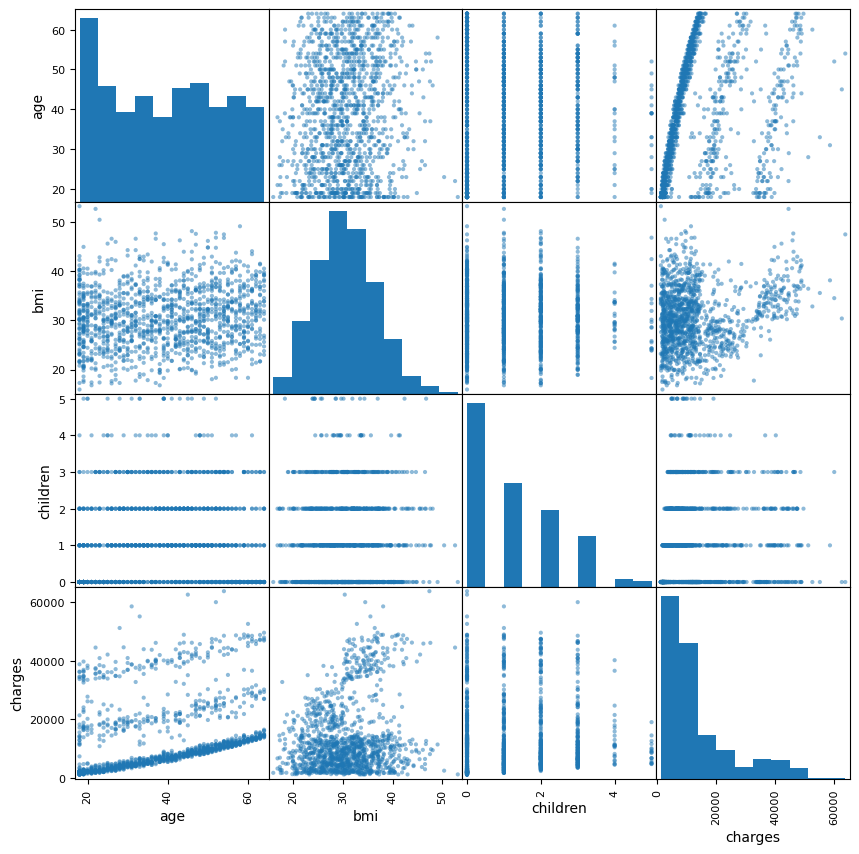

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Affichage du nuage de points pour chaque paire de variables
scatter_matrix(insurance[['age', 'bmi', 'children', 'charges']], figsize=(10, 10), alpha=0.5)

# Affichage du graphique
plt.show()


# Partie 2 « Régression Simple cas Expérience Salaire »:

In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression



# Séparation des variables indépendantes et dépendante
X = exp_salary.iloc[:, :-1].values
y = exp_salary.iloc[:, -1].values

# Entraînement du modèle de régression linéaire
regressor = LinearRegression()
regressor.fit(X, y)

# Affichage du coefficient de détermination (R²)
print('Coefficient de détermination (R²) :', regressor.score(X, y))


Coefficient de détermination (R²) : 0.9569566641435086


In [11]:
# Chargement des données de test fictives
exp_salary_test = pd.DataFrame({'yearsExperience': [3, 6, 9]})

# Prédiction des salaires pour les données de test
y_pred = regressor.predict(exp_salary_test)

# Affichage des prédictions
print('Prédictions de salaire pour les années d\'expérience :', y_pred)

Prédictions de salaire pour les années d'expérience : [ 54142.08716303  82491.9741274  110841.86109176]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


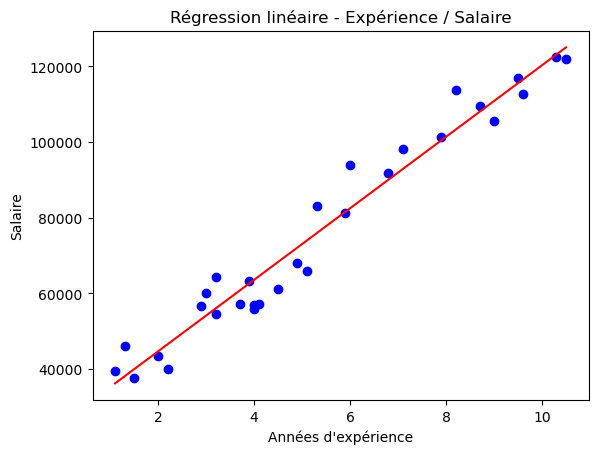

In [12]:
# Tracé du nuage de points des données d'entraînement
plt.scatter(X, y, color='blue')
plt.xlabel('Années d\'expérience')
plt.ylabel('Salaire')

# Tracé de la droite de régression linéaire
plt.plot(X, regressor.predict(X), color='red')
plt.title('Régression linéaire - Expérience / Salaire')
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Prédiction sur le jeu de données d'entraînement
y_pred = regressor.predict(X)

# Calcul des mesures d'erreur
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)

# Affichage des mesures d'erreur
print('MSE :', mse)
print('RMSE :', rmse)
print('MAE :', mae)

MSE : 31270951.722280968
RMSE : 5592.043608760662
MAE : 4644.2012894435375


# partie 3 « Régression multiple cas d’assurance »: 

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np

data = pd.read_csv("datasets/insurance.csv")

# Encodage one-hot des variables catégorielles
cat_cols = ["sex", "smoker", "region"]
enc = OneHotEncoder(handle_unknown="ignore")
enc.fit(data[cat_cols])
cat_array = enc.transform(data[cat_cols]).toarray()
cat_cols_enc = enc.get_feature_names(cat_cols)
data_enc = pd.concat([data.drop(cat_cols, axis=1), pd.DataFrame(cat_array, columns=cat_cols_enc)], axis=1)

X = data_enc.drop("charges", axis=1)
y = data_enc["charges"]

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédiction des données de test
y_pred = model.predict(X_test)

# Calcul des métriques d'évaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE :", mse)
print("RMSE :", rmse)
print("MAE :", mae)
print("R2 :", r2)



MSE : 33596915.85136147
RMSE : 5796.2846592762735
MAE : 4181.194473753644
R2 : 0.7835929767120723


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# partie 4 « Régression linière polynomial multiple cas de china GDP»:

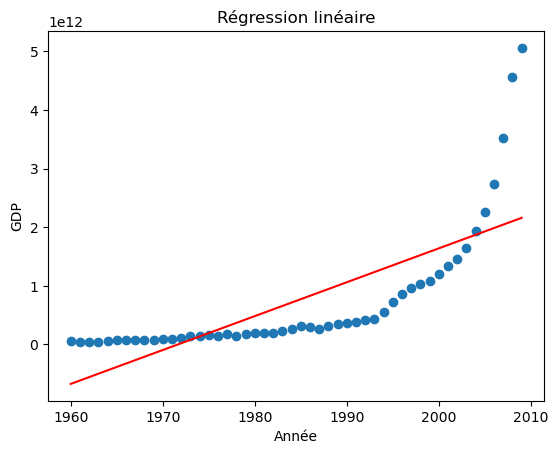

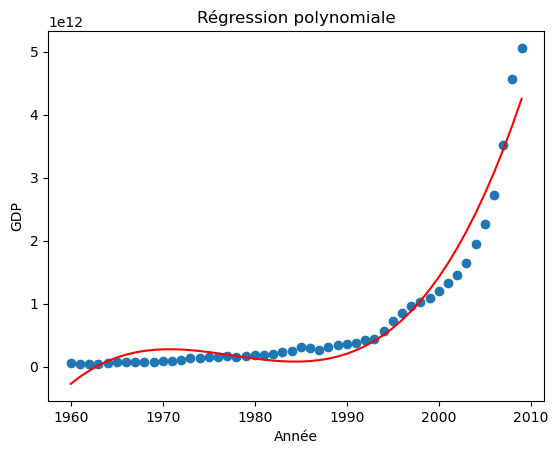

MSE pour la régression linéaire: 3.8449999173939907e+25
RMSE pour la régression linéaire: 6200806332561.912
MAE pour la régression linéaire: 6033925277544.178
MSE pour la régression polynomiale: 7.66455498375188e+24
RMSE pour la régression polynomiale: 2768493269587.6074
MAE pour la régression polynomiale: 2655573143437.3325


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Charger les données
data = pd.read_csv('datasets/china_gdp.csv')
X = np.array(data['Year']).reshape(-1, 1)
y = np.array(data['Value'])

# Diviser les données en ensemble de formation et ensemble de test
train_X = X[:len(X)-5]
train_y = y[:len(y)-5]
test_X = X[len(X)-5:]
test_y = y[len(y)-5:]

# Régression linéaire
lin_reg = LinearRegression()
lin_reg.fit(train_X, train_y)

# Régression polynomiale
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(train_X)
poly_reg.fit(X_poly, train_y)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, train_y)

# Prédiction pour les deux modèles
pred_lin = lin_reg.predict(test_X)
pred_poly = lin_reg2.predict(poly_reg.fit_transform(test_X))

# Visualisation des résultats de la régression linéaire
plt.scatter(train_X, train_y)
plt.plot(train_X, lin_reg.predict(train_X), color='red')
plt.xlabel('Année')
plt.ylabel('GDP')
plt.title('Régression linéaire')
plt.show()

# Visualisation des résultats de la régression polynomiale
plt.scatter(train_X, train_y)
plt.plot(train_X, lin_reg2.predict(poly_reg.fit_transform(train_X)), color='red')
plt.xlabel('Année')
plt.ylabel('GDP')
plt.title('Régression polynomiale')
plt.show()

# Evaluation des deux modèles
mse_lin = mean_squared_error(test_y, pred_lin)
rmse_lin = np.sqrt(mse_lin)
mae_lin = mean_absolute_error(test_y, pred_lin)
print("MSE pour la régression linéaire:", mse_lin)
print("RMSE pour la régression linéaire:", rmse_lin)
print("MAE pour la régression linéaire:", mae_lin)

mse_poly = mean_squared_error(test_y, pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(test_y, pred_poly)
print("MSE pour la régression polynomiale:", mse_poly)
print("RMSE pour la régression polynomiale:", rmse_poly)
print("MAE pour la régression polynomiale:", mae_poly)
